In [1]:
import time
import os 
import psutil
import datetime
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
import pandas as pd
from scipy import stats
from IPython.display import display
import tensorflow as tf
import gpflow 

In [2]:
percentages = [1,2,5,10,20,30,40,50,60,70,80,90,100]
for i in percentages:
    tf.compat.v1.get_default_graph()
    tf.compat.v1.set_random_seed(0)
    tf.random.set_seed(0)
    gpflow.config.set_default_float(np.float64)
    %run ./time.py $i


  0%|          | 0/312 [00:00<?, ?it/s]

1


  0%|          | 0/312 [00:00<?, ?it/s]

2


  0%|          | 0/312 [00:00<?, ?it/s]

5


  0%|          | 0/312 [00:00<?, ?it/s]

10


  0%|          | 0/312 [00:00<?, ?it/s]

20


  0%|          | 0/312 [00:00<?, ?it/s]

30


  0%|          | 0/312 [00:00<?, ?it/s]

40


  0%|          | 0/312 [00:00<?, ?it/s]

50


  0%|          | 0/312 [00:00<?, ?it/s]

60


  0%|          | 0/312 [00:00<?, ?it/s]

70


  0%|          | 0/312 [00:00<?, ?it/s]

80


  0%|          | 0/312 [00:00<?, ?it/s]

90


  0%|          | 0/312 [00:00<?, ?it/s]

100


100%|██████████| 312/312 [2:20:52<00:00, 27.09s/it]  


In [17]:
percentages = [2,5,10,20,30,40,50,60,70,80,90,100]
time_list = ['00:16:42','00:16:41','00:18:17','00:22:41','00:27:10','00:34:15','00:43:29','00:54:14','1:07:06','1:24:55','1:49:09','2:20:52']
minutes= []
for i in range(len(time_list)):
    x = time.strptime(time_list[i].split(',')[0],'%H:%M:%S')
    second = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    minutes.append(second/60.0)
    print(minutes[i])

16.7
16.683333333333334
18.283333333333335
22.683333333333334
27.166666666666668
34.25
43.483333333333334
54.233333333333334
67.1
84.91666666666667
109.15
140.86666666666667


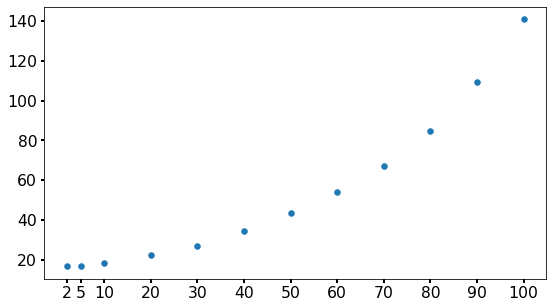

In [25]:
percentages = [2,5,10,20,30,40,50,60,70,80,90,100]
plt.figure(figsize=(9,5))
plt.rcParams.update({'font.size': 13})
plt.xticks(percentages)
plt.scatter(percentages,minutes,s=30,label ='time in minutes')
plt.tick_params(labelsize='large', width=2)

plt.show()

In [19]:
GPcounts_NB_full = pd.read_csv('ll_true_100_percentage_Negative_binomial_pseudoT_Index_10.csv',index_col=[0])
GPcounts_NB_full_sorted = GPcounts_NB_full.sort_values(by=['log_likelihood_ratio'], ascending=False)

1
(312, 3)
Correlation score at:0.1 of the dataset:
NB sparse likelihood 0.3463709677419355
Correlation score at:0.2 of the dataset:
NB sparse likelihood 0.37150915363501297
Correlation score at:0.30000000000000004 of the dataset:
NB sparse likelihood 0.43620005371370585
Correlation score at:0.4 of the dataset:
NB sparse likelihood 0.47381904012588516
Correlation score at:0.5 of the dataset:
NB sparse likelihood 0.4865704667225111
Correlation score at:0.6000000000000001 of the dataset:
NB sparse likelihood 0.5367835160519565
Correlation score at:0.7000000000000001 of the dataset:
NB sparse likelihood 0.5837974736327576
Correlation score at:0.8 of the dataset:
NB sparse likelihood 0.6057551496307813
Correlation score at:0.9 of the dataset:
NB sparse likelihood 0.6155708983168517
Correlation score at:1.0 of the dataset:
NB sparse likelihood 0.6117780188848474
5.068154738456245
2
(312, 3)
Correlation score at:0.1 of the dataset:
NB sparse likelihood 0.9665322580645164
Correlation score at

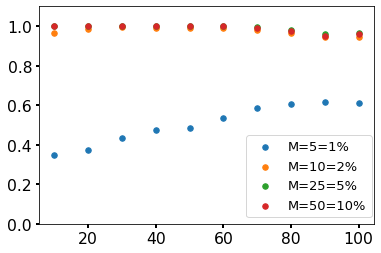

In [20]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10 # cut a percentage from the dataset
percentages = [1,2,5,10]
M = [5,10,25,50]
counts = 0
for dataset in percentages:
    print(dataset)
    GPcounts_NB = pd.read_csv('ll_true_'+str(dataset)+'_percentage_Negative_binomial_pseudoT_Index_10.csv',index_col=[0])
    GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
    print(GPcounts_NB.shape)
    GPcounts_NB_index = list(GPcounts_NB_sorted.index.values)
    # index of genes ranked by log likelihood ratio from GPcounts with full NB likelihood
    GPcounts_NB_full_index = list(GPcounts_NB_full_sorted.index.values) 
    # index of genes ranked by log likelihood ratio from GPcounts with sparse NB likelihood
    GPcounts_NB_index = list(GPcounts_NB_sorted.index.values)

    corr_NB = [] # correlation score between GPcounts_NB full rank and GPcounts_NB sparse rank

    for count in range(10):
        print('Correlation score at:'+str(percentage[count])+' of the dataset:')
        # cut a percentage from the indexes
        GPcounts_NB_full_index_part= GPcounts_NB_full_index[int(len(GPcounts_NB_full_index) * .0) : int(len(GPcounts_NB_full_index) * percentage[count])]
        GPcounts_NB_rank_part = []

        for i in GPcounts_NB_full_index_part:
            # locate gene from NB full rank in GPcounts sparse rank to correlate ranking
            GPcounts_NB_rank_part.append(GPcounts_NB_index.index(i))

        GPcounts_NB_full_rank_part = list(range(0,len(GPcounts_NB_full_index_part)))

        rho, pval = stats.spearmanr(GPcounts_NB_full_rank_part,GPcounts_NB_rank_part)
        corr_NB.append(rho)
        print('NB sparse likelihood',rho)
 
    plt.scatter(percentage*100,corr_NB,s=30,label ='M='+str(M[counts])+'='+str(dataset)+'%')
    plt.tick_params(labelsize='large', width=2)
    plt.ylim(0.0,1.1)
    plt.legend(bbox_to_anchor=(.6, .0), loc='lower left', ncol=1)
    print(sum(corr_NB))
    counts = counts + 1
    #plt.legend()
plt.show()